<a href="https://colab.research.google.com/github/mmk32001/Fake-News-Detection/blob/main/Fake_News_Prediction_Final1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/mmk32001/New-Repository/blob/master/Fake_News_Prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import Libraries**

---



In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

### **Load Dataset**

---



In [2]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [3]:
print(fake.shape)
print(true.shape)

(23481, 4)
(21417, 4)


### **Data Preprocessing**

---



In [4]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [5]:
fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [6]:
true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


In [7]:
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [8]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

In [9]:
data.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [10]:
data.tail()

,title,text,subject,date,target
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",true


In [11]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [12]:
data.head()

,title,text,subject,date,target
0,White House weighs possible Supreme Court nomi...,WASHINGTON (Reuters) - Nevada Governor Brian S...,politicsNews,"February 24, 2016",true
1,U.S. Treasury dashes hopes for near-term World...,WASHINGTON (Reuters) - A U.S. Treasury officia...,politicsNews,"October 11, 2017",true
2,Egyptian court hands fresh life sentence to Mu...,CAIRO (Reuters) - An Egyptian court sentenced ...,worldnews,"September 28, 2017",true
3,BREAKING: PROTESTER JUMPS ON STAGE…Grabs Trump...,A protester tried to attack Trump today at a r...,politics,"Mar 12, 2016",fake
4,We May Already Have More Than Half The Republ...,There are several movements out there to try a...,News,"December 14, 2016",fake


In [13]:
# Removing the date 
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,White House weighs possible Supreme Court nomi...,WASHINGTON (Reuters) - Nevada Governor Brian S...,politicsNews,true
1,U.S. Treasury dashes hopes for near-term World...,WASHINGTON (Reuters) - A U.S. Treasury officia...,politicsNews,true
2,Egyptian court hands fresh life sentence to Mu...,CAIRO (Reuters) - An Egyptian court sentenced ...,worldnews,true
3,BREAKING: PROTESTER JUMPS ON STAGE…Grabs Trump...,A protester tried to attack Trump today at a r...,politics,fake
4,We May Already Have More Than Half The Republ...,There are several movements out there to try a...,News,fake


In [14]:
# Removing the title
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,WASHINGTON (Reuters) - Nevada Governor Brian S...,politicsNews,true
1,WASHINGTON (Reuters) - A U.S. Treasury officia...,politicsNews,true
2,CAIRO (Reuters) - An Egyptian court sentenced ...,worldnews,true
3,A protester tried to attack Trump today at a r...,politics,fake
4,There are several movements out there to try a...,News,fake


In [15]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,washington (reuters) - nevada governor brian s...,politicsNews,true
1,washington (reuters) - a u.s. treasury officia...,politicsNews,true
2,cairo (reuters) - an egyptian court sentenced ...,worldnews,true
3,a protester tried to attack trump today at a r...,politics,fake
4,there are several movements out there to try a...,News,fake


In [16]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [17]:
data.head()

,text,subject,target
0,washington reuters nevada governor brian sand...,politicsNews,true
1,washington reuters a us treasury official das...,politicsNews,true
2,cairo reuters an egyptian court sentenced top...,worldnews,true
3,a protester tried to attack trump today at a r...,politics,fake
4,there are several movements out there to try a...,News,fake


In [18]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
data.head()

,text,subject,target
0,washington reuters nevada governor brian sando...,politicsNews,true
1,washington reuters us treasury official dashed...,politicsNews,true
2,cairo reuters egyptian court sentenced top mus...,worldnews,true
3,protester tried attack trump today rally dayto...,politics,fake
4,several movements try stop trump officially be...,News,fake


In [20]:
data.tail()

,text,subject,target
44893,talk impeachment commonplace congress since do...,News,fake
44894,,politics,fake
44895,washingtonnew york reuters us president donald...,politicsNews,true
44896,april 3 2016 melissa boarts frantic mother too...,News,fake
44897,new york reuters michael moore leftwing filmma...,politicsNews,true


In [21]:
def remove_numbers(text):
    clean_str = re.sub('[^a-zA-Z]',' ',text)
    return clean_str


data['text'] = data['text'].apply(remove_numbers)

In [22]:
data.tail()

,text,subject,target
44893,talk impeachment commonplace congress since do...,News,fake
44894,,politics,fake
44895,washingtonnew york reuters us president donald...,politicsNews,true
44896,april melissa boarts frantic mother too...,News,fake
44897,new york reuters michael moore leftwing filmma...,politicsNews,true


### **Data Visualisation**

---



subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


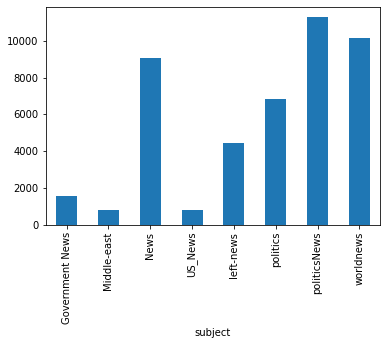

In [23]:
# How many articles per subject?

print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


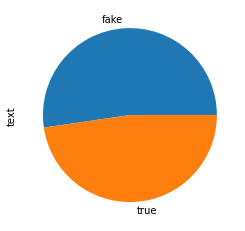

In [24]:
# How many fake and real articles?

print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="pie")
plt.show()

In [25]:
pip install wordcloud

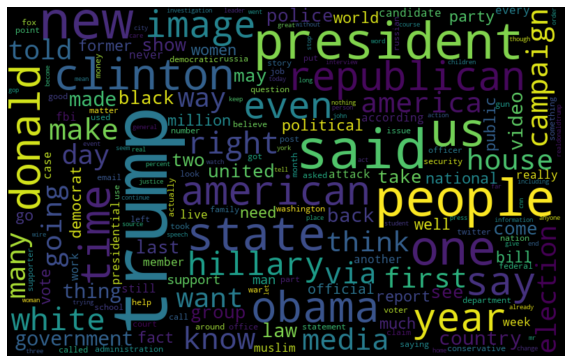

In [26]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

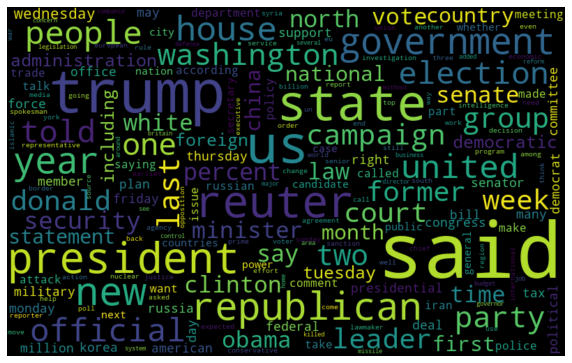

In [27]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in real_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
# Most frequent words counter   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

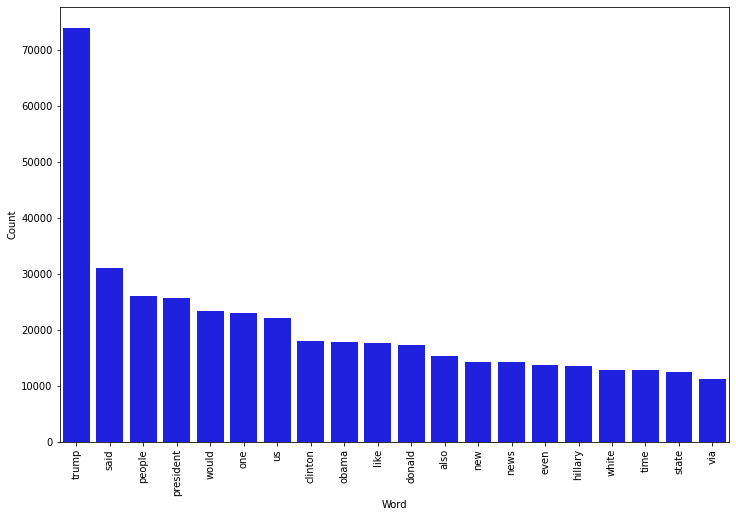

In [29]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

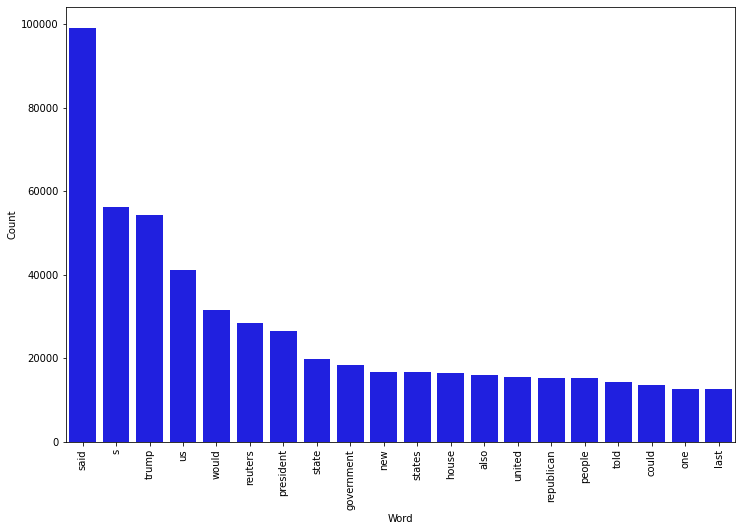

In [30]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

In [31]:
data['target'].unique()

array(['true', 'fake'], dtype=object)

In [32]:
# Encoding true=1 and fake=0
from sklearn import preprocessing
 
label_encoder = preprocessing.LabelEncoder()
 
data['target']= label_encoder.fit_transform(data['target'])
 
data['target'].unique()

array([1, 0])

In [33]:
targets=data.target
targets.head()

0    1
1    1
2    1
3    0
4    0
Name: target, dtype: int64

In [34]:
data['target'].unique()

array([1, 0])

In [35]:
print(data['target'])

0        1
1        1
2        1
3        0
4        0
        ..
44893    0
44894    0
44895    1
44896    0
44897    1
Name: target, Length: 44898, dtype: int64


### **Splitting Dataset**

---



In [36]:
# Split the dataset
x_train,x_test,y_train,y_test=train_test_split(data['text'], targets, test_size=0.4, random_state=7)

In [37]:
# Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

In [38]:
# Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

### **Logistic Regression**

---



In [39]:
Logistic_model= LogisticRegression()

In [40]:
Logistic_model.fit(tfidf_train,y_train)    

LogisticRegression()

In [41]:
Logistic_predict = Logistic_model.predict(tfidf_test)
testing_data_accuracy = accuracy_score(Logistic_predict, y_test)
print("Logistic Regression Accuracy: {}%".format(round(testing_data_accuracy*100,2)))

Logistic Regression Accuracy: 98.02%


In [42]:
print("Logistic Regression Precision: {}%".format(round(metrics.precision_score(Logistic_predict,y_test)*100,2)))

Logistic Regression Precision: 98.07%


In [43]:
print("Logistic Regression Recall: {}%".format(round(metrics.recall_score(Logistic_predict,y_test)*100,2)))

Logistic Regression Recall: 97.78%


In [44]:
print("Logistic Regression F1 Score: {}%".format(round(metrics.f1_score(y_test,Logistic_predict)*100,2)))

Logistic Regression F1 Score: 97.92%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


[Text(0, 0.5, 'Real'), Text(0, 1.5, 'Fake')]

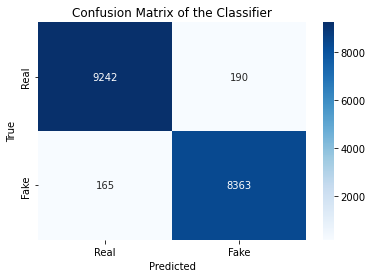

In [45]:
cm = confusion_matrix(y_test,Logistic_predict)
#plotting confusion matrix
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd')
plt.title('Confusion Matrix of the Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

ax = plt.axes()
ax.set_xticklabels(["Real", "Fake"])
  

ax.set_yticklabels(["Real", "Fake"])

In [46]:
a = [['Accuracy', testing_data_accuracy*100], ['Precision', round(metrics.precision_score(Logistic_predict,y_test)*100,2)], ['Recall', round(metrics.recall_score(Logistic_predict,y_test)*100,2)], ['F1 score', round(metrics.f1_score(y_test,Logistic_predict)*100,2)]]
output = pd.DataFrame(a, columns = ['Performance', 'Value for 100%'])
output

,Performance,Value for 100%
0,Accuracy,98.023385
1,Precision,98.070000
2,Recall,97.780000
3,F1 score,97.920000


### **SVM**

---



In [47]:
svm_model=svm.SVC(kernel="linear")
svm_model.fit(tfidf_train,y_train)


SVC(kernel='linear')

In [48]:
svm_predict=svm_model.predict(tfidf_test)


In [49]:
print("SVM(Linear) Accuracy: {}%".format(round(accuracy_score(y_test, svm_predict)*100,2)))

SVM(Linear) Accuracy: 99.24%


In [50]:
print("SVM(Linear) Precision: {}%".format(round(metrics.precision_score(svm_predict,y_test)*100,2)))

SVM(Linear) Precision: 99.39%


In [51]:
print("SVM(Linear) Recall: {}%".format(round(metrics.recall_score(svm_predict,y_test)*100,2)))

SVM(Linear) Recall: 99.02%


In [52]:
print("SVM(Linear) F1 score: {}%".format(round(metrics.f1_score(y_test,svm_predict)*100,2)))

SVM(Linear) F1 score: 99.2%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


[Text(0, 0.5, 'Real'), Text(0, 1.5, 'Fake')]

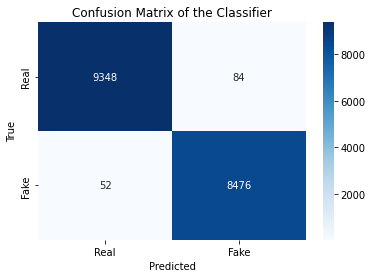

In [53]:
cm = confusion_matrix(y_test,svm_predict)
#plotting confusion matrix
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd')
plt.title('Confusion Matrix of the Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

ax = plt.axes()
ax.set_xticklabels(["Real", "Fake"])
  

ax.set_yticklabels(["Real", "Fake"])

In [54]:
b = [['Accuracy', round(accuracy_score(y_test, svm_predict)*100,2)], ['Precision', round(metrics.precision_score(svm_predict,y_test)*100,2)], ['Recall', round(metrics.recall_score(svm_predict,y_test)*100,2)], ['F1 score', round(metrics.f1_score(y_test,svm_predict)*100,2)]]
output1 = pd.DataFrame(b, columns = ['Performance', 'Value for 100%'])
output1

,Performance,Value for 100%
0,Accuracy,99.24
1,Precision,99.39
2,Recall,99.02
3,F1 score,99.20


### **Passive Aggressive Classifier**

---



In [55]:
# Initialize a PassiveAggressiveClassifier

pac_model=PassiveAggressiveClassifier(max_iter=50)
pac_model.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [56]:
# Predict on the test set and calculate accuracy

pac_predict=pac_model.predict(tfidf_test)
score=accuracy_score(y_test,pac_predict)
print("Passive Agressive Classifier Acccuracy: {}%".format(round(score*100,2)))

Passive Agressive Classifier Acccuracy: 99.31%


In [57]:
print("Passive Agressive Classifier Precision: {}%".format(round(metrics.precision_score(pac_predict,y_test)*100,2)))

Passive Agressive Classifier Precision: 99.33%


In [58]:
print("Passive Agressive Classifier Recall: {}%".format(round(metrics.recall_score(pac_predict,y_test)*100,2)))

Passive Agressive Classifier Recall: 99.22%


In [59]:
print("Passive Agressive Classifier F1 Score: {}%".format(round(metrics.f1_score(y_test,pac_predict)*100,2)))

Passive Agressive Classifier F1 Score: 99.27%


In [60]:
#Build confusion matrix
cm = confusion_matrix(y_test,pac_predict, labels=[0,1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


[Text(0, 0.5, 'Real'), Text(0, 1.5, 'Fake')]

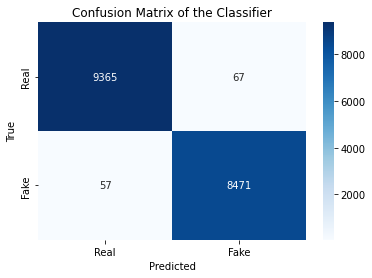

In [61]:
#plotting confusion matrix
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd')
plt.title('Confusion Matrix of the Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

ax = plt.axes()
ax.set_xticklabels(["Real", "Fake"])
  

ax.set_yticklabels(["Real", "Fake"])

In [62]:
c = [['Accuracy', round(accuracy_score(y_test, pac_predict)*100,2)], ['Precision', round(metrics.precision_score(pac_predict,y_test)*100,2)], ['Recall', round(metrics.recall_score(pac_predict,y_test)*100,2)], ['F1 score', round(metrics.f1_score(y_test,pac_predict)*100,2)]]
output2 = pd.DataFrame(c, columns = ['Performance', 'Value for 100%'])
output2

,Performance,Value for 100%
0,Accuracy,99.31
1,Precision,99.33
2,Recall,99.22
3,F1 score,99.27


### **Decision Tree Classifier**

---



In [63]:

# Vectorizing and applying TF-IDF
pipe =DecisionTreeClassifier(criterion= 'entropy',random_state=42)
# Fitting the model
dtc_model = pipe.fit(tfidf_train, y_train)

# Accuracy
dtc_predict = dtc_model.predict(tfidf_test)
print("Decision Tree Classifier Accuracy: {}%".format(round(accuracy_score(y_test, dtc_predict)*100,2)))

Decision Tree Classifier Accuracy: 99.48%


In [64]:
print("Decision Tree Classifier Precision: {}%".format(round(metrics.precision_score(dtc_predict,y_test)*100,2)))

Decision Tree Classifier Precision: 99.44%


In [65]:
print("Decision Tree Classifier Recall: {}%".format(round(metrics.recall_score(dtc_predict,y_test)*100,2)))

Decision Tree Classifier Recall: 99.46%


In [66]:
print("Decision Tree Classifier F1 Score: {}%".format(round(metrics.f1_score(y_test,dtc_predict)*100,2)))

Decision Tree Classifier F1 Score: 99.45%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


[Text(0, 0.5, 'Real'), Text(0, 1.5, 'Fake')]

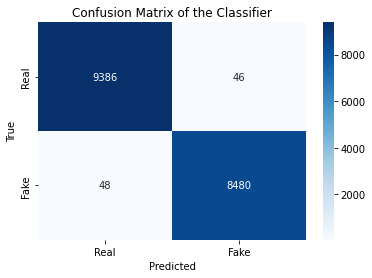

In [67]:
cm = confusion_matrix(y_test, dtc_predict)
#plotting confusion matrix
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd')
plt.title('Confusion Matrix of the Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

ax = plt.axes()
ax.set_xticklabels(["Real", "Fake"])
  

ax.set_yticklabels(["Real", "Fake"])

In [68]:
d = [['Accuracy', round(accuracy_score(y_test, dtc_predict)*100,2)], ['Precision', round(metrics.precision_score(dtc_predict,y_test)*100,2)], ['Recall', round(metrics.recall_score(dtc_predict,y_test)*100,2)], ['F1 score', round(metrics.f1_score(y_test,dtc_predict)*100,2)]]
output3 = pd.DataFrame(d, columns = ['Performance', 'Value for 100%'])
output3

,Performance,Value for 100%
0,Accuracy,99.48
1,Precision,99.44
2,Recall,99.46
3,F1 score,99.45


### **Random Forest Classifier**

---



In [69]:
rfc_model=RandomForestClassifier(max_features=10,n_estimators=100)
rfc_model.fit(tfidf_train,y_train)

RandomForestClassifier(max_features=10)

In [70]:
rfc_predict = rfc_model.predict(tfidf_test)
print("Random Forest Classifier Accuracy: {}%".format(round(accuracy_score(y_test, rfc_predict)*100,2)))

Random Forest Classifier Accuracy: 96.25%


In [71]:
print("Random Forest Classifier Precision: {}%".format(round(metrics.precision_score(rfc_predict,y_test)*100,2)))

Random Forest Classifier Precision: 96.89%


In [72]:
print("Random Forest Classifier Recall: {}%".format(round(metrics.recall_score(rfc_predict,y_test)*100,2)))

Random Forest Classifier Recall: 95.29%


In [73]:
print("Random Forest Classifier F1 Score: {}%".format(round(metrics.f1_score(y_test,rfc_predict)*100,2)))

Random Forest Classifier F1 Score: 96.09%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


[Text(0, 0.5, 'Real'), Text(0, 1.5, 'Fake')]

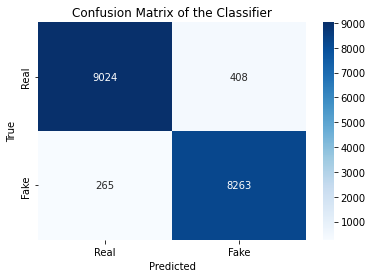

In [74]:
cm = confusion_matrix(y_test, rfc_predict)
#plotting confusion matrix
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd')
plt.title('Confusion Matrix of the Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

ax = plt.axes()
ax.set_xticklabels(["Real", "Fake"])
  

ax.set_yticklabels(["Real", "Fake"])

In [75]:
e = [['Accuracy', round(accuracy_score(y_test, rfc_predict)*100,2)], ['Precision', round(metrics.precision_score(rfc_predict,y_test)*100,2)], ['Recall', round(metrics.recall_score(rfc_predict,y_test)*100,2)], ['F1 score', round(metrics.f1_score(y_test,rfc_predict)*100,2)]]
output4 = pd.DataFrame(e, columns = ['Performance', 'Value for 100%'])
output4

,Performance,Value for 100%
0,Accuracy,96.25
1,Precision,96.89
2,Recall,95.29
3,F1 score,96.09


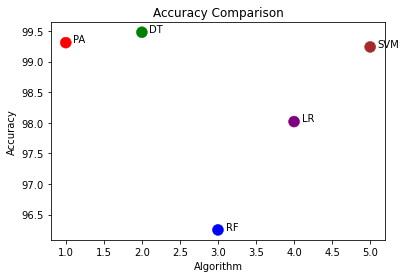

In [76]:

left = [1, 2, 3, 4, 5]
annotations=['PA', 'DT', 'RF','LR','SVM']
height = [round(score*100,2), round(accuracy_score(y_test, dtc_predict)*100,2), round(accuracy_score(y_test, rfc_predict)*100,2),round(accuracy_score(y_test, Logistic_predict)*100,2),round(accuracy_score(y_test, svm_predict)*100,2)]
plt.scatter(left, height, color = ['red', 'green','blue','purple','brown'],linewidths = 0.5, s=120)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
for i, label in enumerate(annotations):
    plt.annotate(label, (left[i]+0.1, height[i]))
 
plt.show()

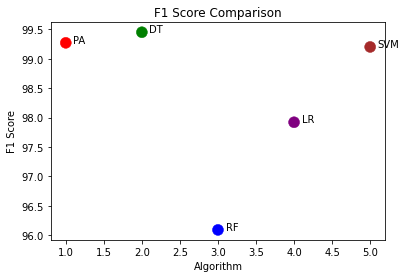

In [77]:
left = [1, 2, 3, 4, 5]
annotations=['PA', 'DT', 'RF','LR','SVM']
height = [round(metrics.f1_score(y_test,pac_predict)*100,2),round(metrics.f1_score(y_test,dtc_predict)*100,2),round(metrics.f1_score(y_test,rfc_predict)*100,2),round(metrics.f1_score(y_test,Logistic_predict)*100,2),round(metrics.f1_score(y_test,svm_predict)*100,2)]
plt.scatter(left, height, color = ['red', 'green','blue','purple','brown'],linewidths = 0.5, s=120)
plt.xlabel('Algorithm')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison')
for i, label in enumerate(annotations):
    plt.annotate(label, (left[i]+0.1, height[i]))
 
plt.show()

### **Take Input**

---



In [78]:
print(y_test)

25168    0
5096     0
3123     1
37809    0
27507    0
        ..
9603     1
42809    0
820      0
37697    0
23394    1
Name: target, Length: 17960, dtype: int64


In [92]:
i=int(input())
X_new = tfidf_test[i]
prediction = dtc_model.predict(X_new)
print(prediction)

if (prediction[0]==1):
  print('The news is Real')
else:
  print('The news is Fake')

3
[0]
The news is Fake


In [80]:

def testing(j):
  news = {"text":[j]}
  sample = pd.DataFrame(news)
  sample['text'] = sample['text'].apply(lambda x: x.lower())
  sample['text'] = sample['text'].apply(punctuation_removal)
  sample['text'] = sample['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
  sample['text'] = sample['text'].apply(remove_numbers)
  sample1=sample["text"]
  sample2=tfidf_vectorizer.transform(sample1)
  return sample2




In [95]:
def pred(samp):
  prediction = dtc_model.predict(samp)
  print(prediction)

  if (prediction[0]==1):
    print('The news is Real')
  else:
    print('The news is Fake')

In [96]:
j=input()
sampling=testing(j)
pred(sampling)

WEST PALM BEACH, Fla./WASHINGTON (Reuters) - The White House said on Friday it was set to kick off talks next week with Republican and Democratic congressional leaders on immigration policy, government spending and other issues that need to be wrapped up early in the new year. The expected flurry of legislative activity comes as Republicans and Democrats begin to set the stage for midterm congressional elections in November. President Donald Trump’s Republican Party is eager to maintain control of Congress while Democrats look for openings to wrest seats away in the Senate and the House of Representatives. On Wednesday, Trump’s budget chief Mick Mulvaney and legislative affairs director Marc Short will meet with Senate Majority Leader Mitch McConnell and House Speaker Paul Ryan - both Republicans - and their Democratic counterparts, Senator Chuck Schumer and Representative Nancy Pelosi, the White House said. That will be followed up with a weekend of strategy sessions for Trump, McConn

In [97]:
j=input()
sampling=testing(j)
pred(sampling)

The number of cases of cops brutalizing and killing people of color seems to see no end. Now, we have another case that needs to be shared far and wide. An Alabama woman by the name of Angela Williams shared a graphic photo of her son, lying in a hospital bed with a beaten and fractured face, on Facebook. It needs to be shared far and wide, because this is unacceptable.It is unclear why Williams  son was in police custody or what sort of altercation resulted in his arrest, but when you see the photo you will realize that these details matter not. Cops are not supposed to beat and brutalize those in their custody. In the post you are about to see, Ms. Williams expresses her hope that the cops had their body cameras on while they were beating her son, but I think we all know that there will be some kind of convenient  malfunction  to explain away the lack of existence of dash or body camera footage of what was clearly a brutal beating. Hell, it could even be described as attempted murder